In [71]:
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline  

In [72]:
def read_points(data_path, delim):
    X = []
    Y = []
    with open(data_path, 'r') as data_file:
        content = data_file.readlines()
        #slice first 3 rows with dataset's info
        content = content[3:]
        for line in content:
            numbers = line.split(delim)
            Xi = []
            Y.append(int(numbers[-1]))
            numbers = numbers[0:-1]
            for n in numbers:
                n = n.replace(',', '.')
                Xi.append(float(n))
            X.append(Xi)  
    return X, Y

In [73]:
data_, num = read_points('out_points.txt', delim=' ')

In [74]:
n_rows, n_columns = 100, 160
data=np.array(data_)
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()
count = ceil(len(data)/len(num))

colors = ['red', 'orange', 'blue', 'green', 'lightblue', 'yellow', 'black', 'purple', 'gray', 'white', 'pink']

bestmatchcolors = []
for color in colors[:len(num)]:
    bestmatchcolors.extend([color]*count)
labels=range(len(data))
print(len(data[0]))

Wall time: 6.39 s
11


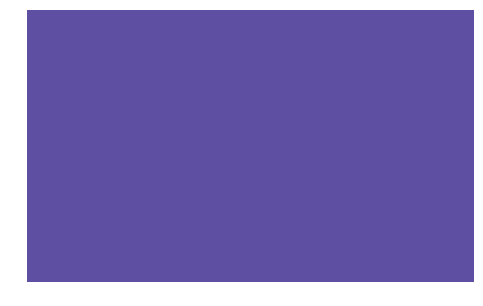

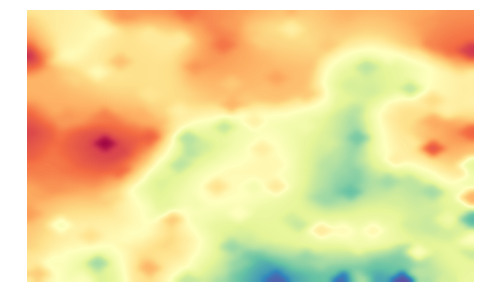

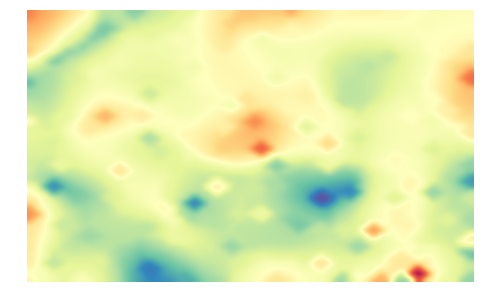

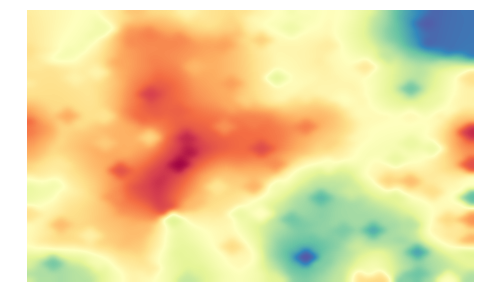

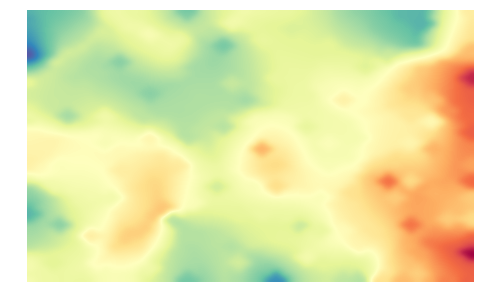

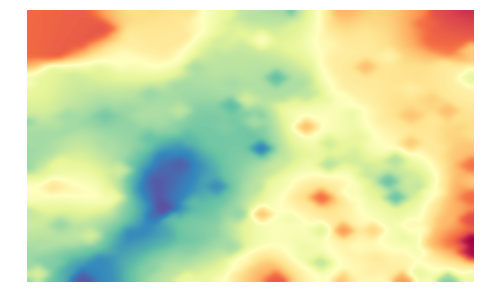

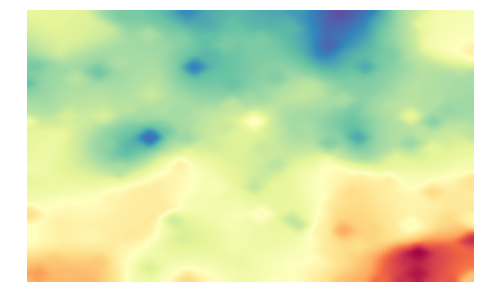

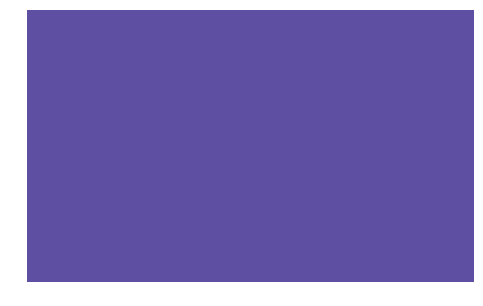

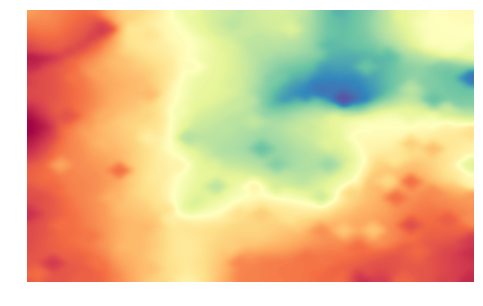

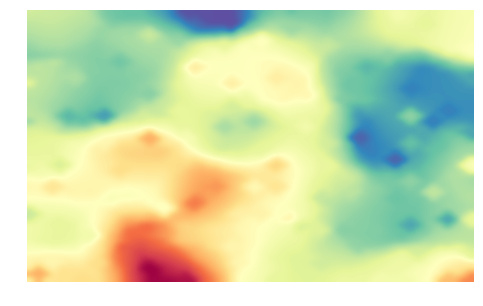

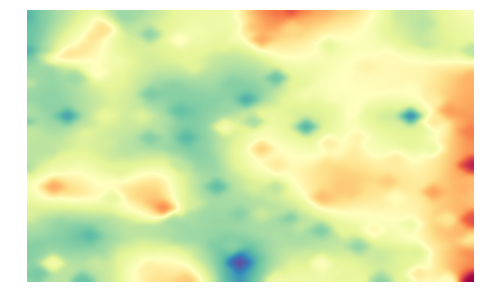

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [75]:
som.view_component_planes(zoom=((50, n_rows), (100, n_columns)))


IndexError: list index out of range

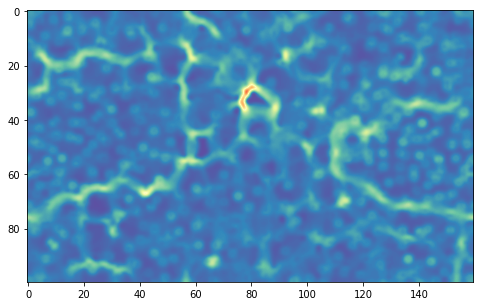

In [82]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

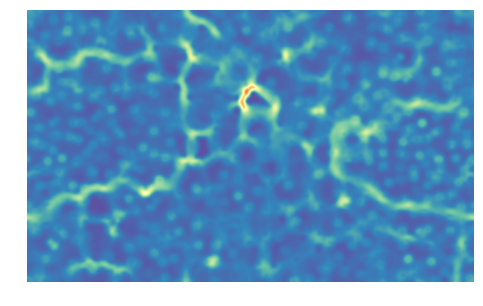

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [77]:
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid")
som.train()
som.view_umatrix(bestmatches=False)

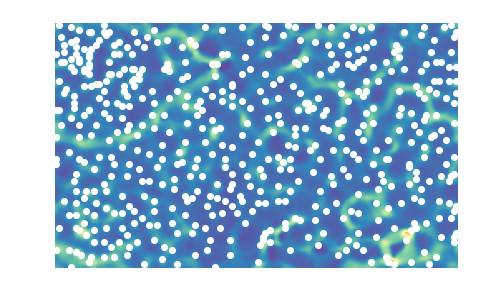

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [67]:
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid", initialization="pca")
som.train()
som.view_umatrix(bestmatches=True)

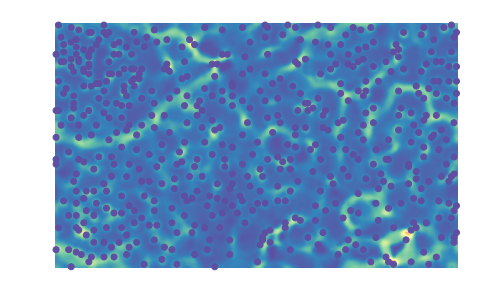

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [68]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

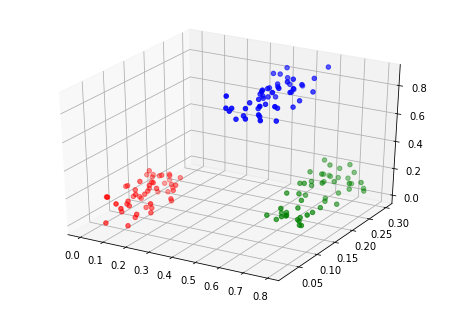

In [53]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [54]:
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

Wall time: 3.68 s


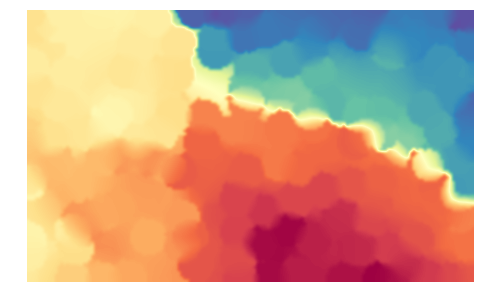

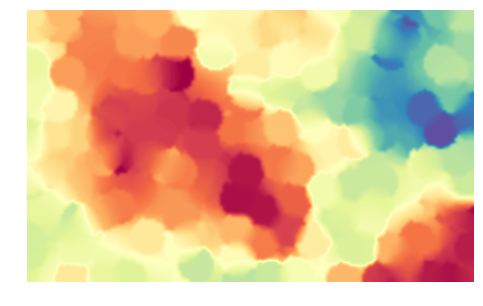

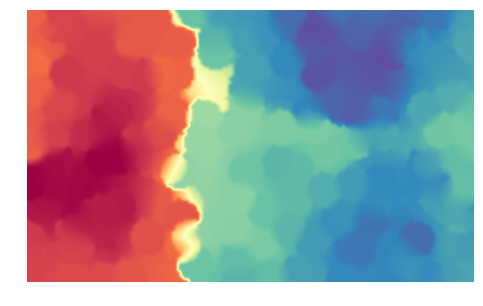

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [55]:
som.view_component_planes()

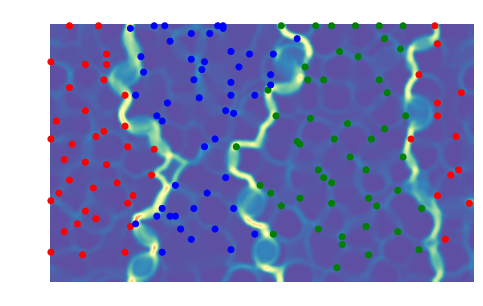

<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [56]:
som = somoclu.Somoclu(n_columns, n_rows, data=data, maptype="toroid")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)